In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
%matplotlib inline

In [5]:
df = pd.read_csv("query.csv", parse_dates=['time'])

In [6]:
#Adding a new column to the dataframe 1 which records just the date of the observation
df['date'] = df['time'].dt.date

In [7]:
#Adding a new column to the dataframe 1 which records just the date of the observation
df['date'] = df['time'].dt.date
#Filtering date after 22nd Nov for the visualization by creating a new dataframe (2)
usgs_1 = df[df['date'] >= pd.Timestamp('2022-11-22')]
#Parsing the dataframe 2's date
usgs_1['date'] = pd.to_datetime(df['date'])

C:\Users\Smous\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\Smous\AppData\Local\Temp\ipykernel_16688\1645631500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs_1['date'] = pd.to_datetime(df['date'])


In [8]:
#Extracting the day information and adding a new column 
usgs_1['day_no'] = usgs_1['date'].dt.day

C:\Users\Smous\AppData\Local\Temp\ipykernel_16688\3643801287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs_1['day_no'] = usgs_1['date'].dt.day


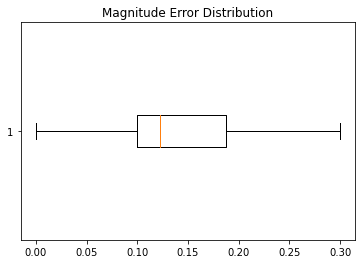

In [228]:
#Taking a look at our data through summary statistics. 
#The boxplot shows us that the magnitude error recorded varies under 0.3.
#The magnitude error is small, and shows that most of the error is minor. This shows that the magnitude measuring procedure is reliable
#Boxplot for errors
usgs_1 = usgs_1.dropna(subset=['magError', 'horizontalError','depthError'])
fig, ax = plt.subplots()
ax.boxplot(usgs_1['magError'], vert = False)
plt.title("Magnitude Error Distribution")
plt.show()

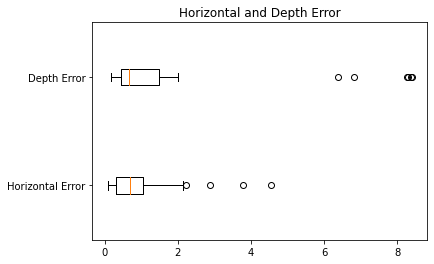

In [227]:
#The horizontal error is the error in the location while depth error is the vertical error in the actual depth recorded.
#The boxplot shows that depth has more spread, with many outliers. The vertical depth seems to be difficult to estimate
#The horizontal error has as many outliers but the spread is small. 
error = [usgs_1['horizontalError'],usgs_1['depthError']]
fig, ax = plt.subplots()
ax.boxplot(error, vert = False)
plt.title("Horizontal and Depth Error")
ax.set_yticklabels(['Horizontal Error','Depth Error'])
plt.show()